3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:
1. Data Exploration and Understanding:
• Dataset Overview:
  1. Load the dataset and display the first 10 rows.

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

2. Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
• Plot a histogram for the Score column to show its distribution and also interpret.
• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/content/drive/MyDrive/AI-ASSIGNMENT/WHR-2024-5CS037.csv")
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [7]:
df.shape

(143, 9)

There are 143 rows and 9 columns

3. List all the columns and their data types.

In [8]:
column_data_types = df.dtypes
print(column_data_types)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.


In [9]:
score_mean = {df["score"].mean()}
score_median = {df["score"].median()}
score_std = {df["score"].std()}

print(f"Mean is : {score_mean}")
print(f"Median is : {score_median}")
print(f"SD is : {score_std}")

Mean is : {5.52758041958042}
Median is : {5.785}
SD is : {1.1707165099442995}


2. Identify the country with the highest and lowest happiness scores.

In [10]:
min_score_row = df.loc[df['score'].idxmin()]
max_score_row = df.loc[df['score'].idxmax()]

print(f"Country with the lowest happiness score : {min_score_row['Country name']} (Happiness Score: {min_score_row['score']})")
print(f"Country with the highest happiness score : {max_score_row['Country name']} (Happiness Score: {max_score_row['score']})")

Country with the lowest happiness score : Afghanistan (Happiness Score: 1.721)
Country with the highest happiness score : Finland (Happiness Score: 7.741)


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.
.

In [11]:
missing_values = df.isnull().sum()
missing_values

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.


In [12]:
filtered_df = df[df['score'] > 7.5]
filtered_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows

In [13]:
sorted_filtered_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
top_10 = sorted_filtered_df.head(10)

print("Top 10 countries with a Score > 7.5, are :",'\n')
top_10

Top 10 countries with a Score > 7.5, are : 



,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [14]:
def happiness_category(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(happiness_category)

df[['score', 'Happiness Category']]

,score,Happiness Category
0,7.741,High
1,7.583,High
2,7.525,High
3,7.344,High
4,7.341,High
...,...,...
138,3.295,Low
139,3.245,Low
140,3.186,Low
141,2.707,Low


2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

• Plot a histogram for the Score column to show its distribution and also interpret.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

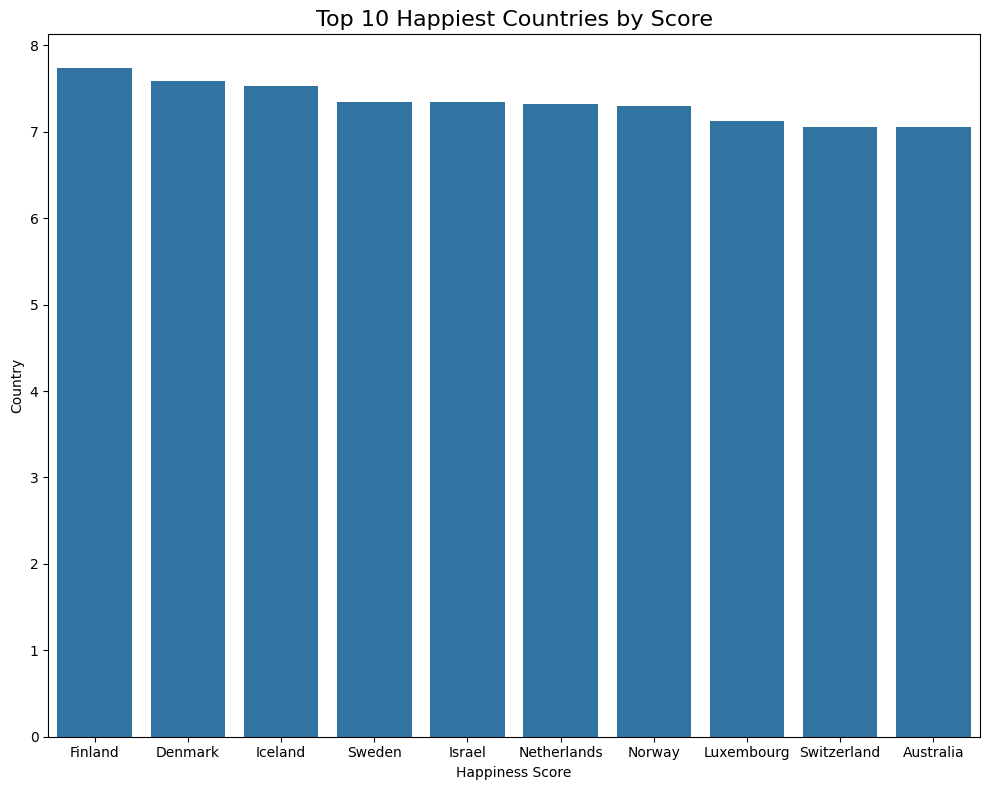

In [15]:
top_10_happiest = df.sort_values(by='score', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Country name', y= 'score', data=top_10_happiest)
plt.title('Top 10 Happiest Countries by Score', fontsize=16)
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


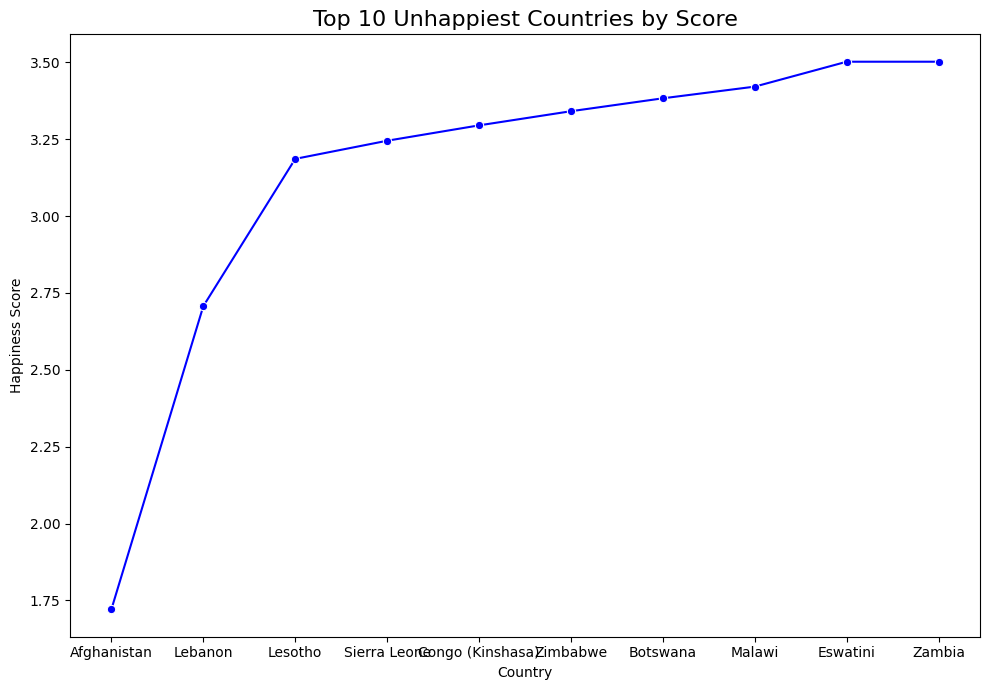

In [16]:
top_10_unhappiest = df.sort_values(by='score', ascending=True).head(10)
# Create a line plot
plt.figure(figsize=(10, 7))
sns.lineplot(x='Country name', y= 'score', data=top_10_unhappiest, marker='o', color='blue')
plt.title('Top 10 Unhappiest Countries by Score', fontsize=16)
plt.xlabel( 'Country')
plt.ylabel( 'Happiness Score')
plt.tight_layout()
plt.show()

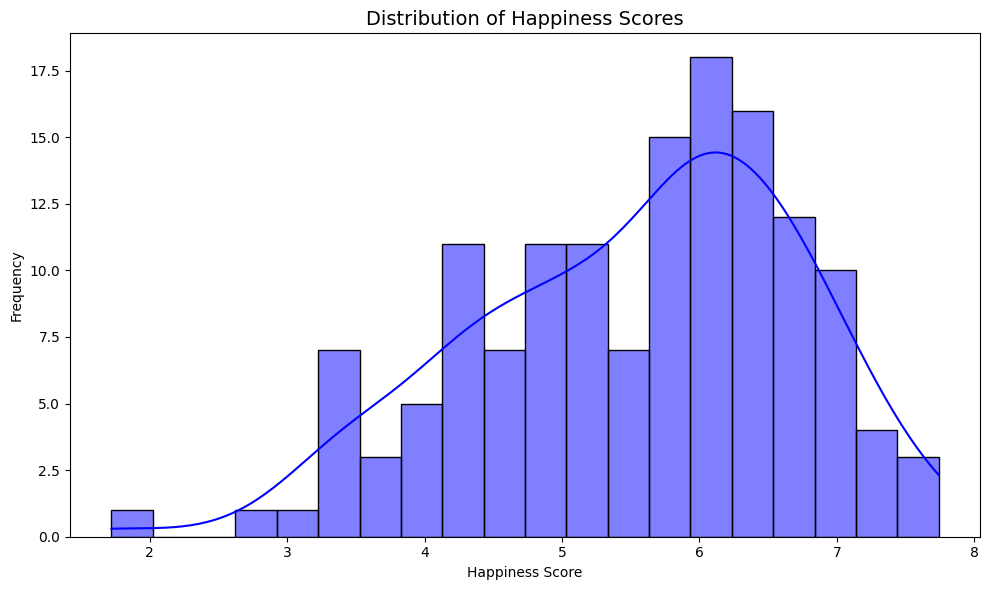

In [17]:
# Create a histogram for the Score column
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Happiness Scores', fontsize=14)
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Here, kde = True allows shows that the histogram is negatively skewed meaning the right side of the bell structure is high on the right side.Meaning the score density around 5 - 7 is the highest.

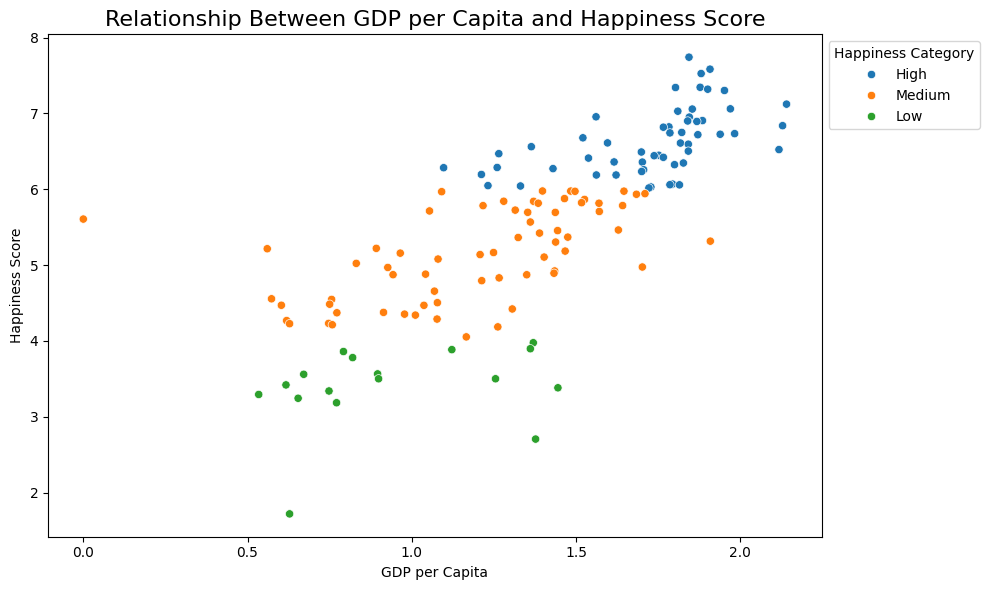

In [18]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x= 'Log GDP per capita', y='score', data=df, hue='Happiness Category')
plt.title('Relationship Between GDP per Capita and Happiness Score', fontsize=16)
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


3.2 Problem - 2

Some Advance Data Exploration Task:
Task - 1 - Setup Task -

Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]


In [19]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]


2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}


In [20]:
south_asian_countries_data = df[df['Country name'].isin(south_asian_countries)]

3. Save the filtered dataframe as separate CSV files for future use.

In [21]:
south_asian_countries_data.to_csv('south_asian_dataset.csv', index=False)
south_asian_countries_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


Task - 2:

Composite Score Ranking:

Tasks:

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy

In [22]:
south_asian_countries_data.loc[:, 'Composite Score'] = (0.40 * south_asian_countries_data['Log GDP per capita'] +
                                               0.30 * south_asian_countries_data['Social support'] +
                                               0.30 * south_asian_countries_data['Healthy life expectancy'])

south_asian_data = south_asian_countries_data.sort_values(by='Composite Score', ascending=False)
south_asian_data

<ipython-input-22-d5c7c7c2b4b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_countries_data.loc[:, 'Composite Score'] = (0.40 * south_asian_countries_data['Log GDP per capita'] +


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


2. Rank the South Asian countries based on the Composite Score in descending order.

In [23]:
descending_south_asian_data = south_asian_data.sort_values(by='Composite Score', ascending=False)
descending_south_asian_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

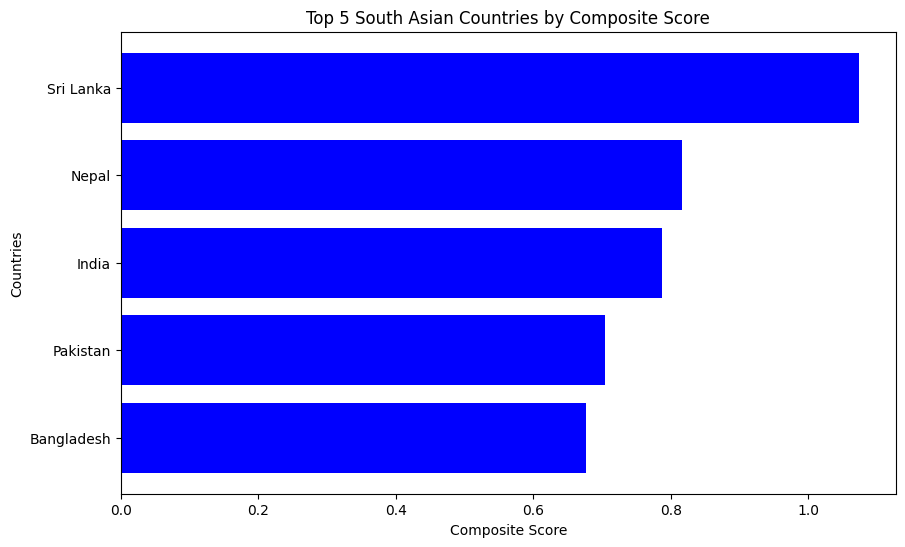

In [25]:
top5_composite = south_asian_data.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top5_composite['Country name'], top5_composite['Composite Score'], color='blue')
plt.xlabel("Composite Score")
plt.ylabel("Countries")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.gca().invert_yaxis()
plt.show()


4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

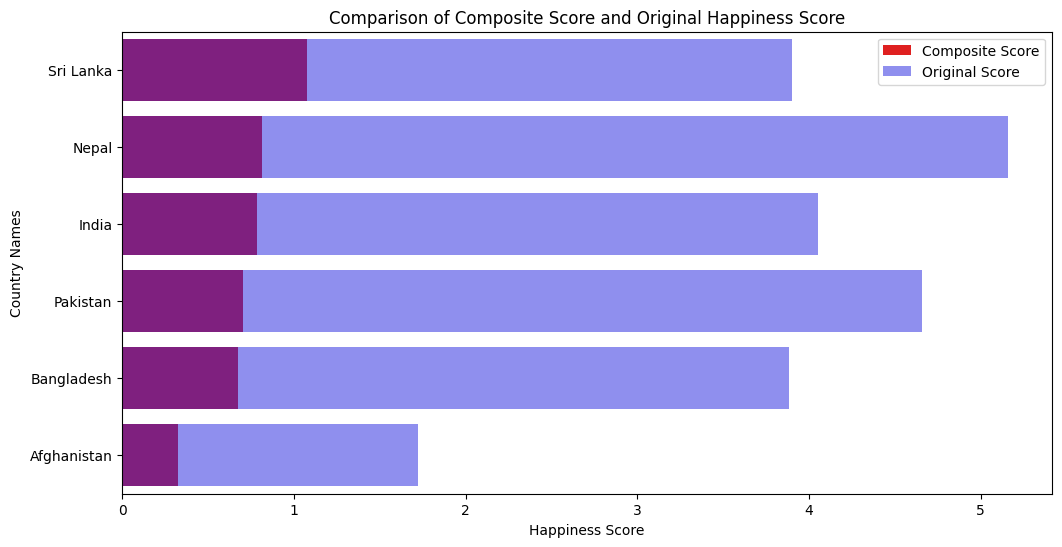

In [26]:
south_asian_data_sorted = south_asian_data[['Country name', 'score', 'Composite Score']].head(10)

# Plotting comparison of the Composite Score vs Original Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Composite Score', y='Country name', data=south_asian_data_sorted, color='red', label='Composite Score')
sns.barplot(x='score', y='Country name', data=south_asian_data_sorted, color='blue', alpha=0.5, label='Original Score')

plt.title("Comparison of Composite Score and Original Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Country Names")
plt.legend()
plt.show()

This suggests that the rankings based on the Composite Score are indeed very well aligned with the rankings based on the original Happiness Score. The countries maintain their relative positions regardless of which score is used.

Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [27]:
# based on score
Q1_score = south_asian_data['score'].quantile(0.25)
Q3_score = south_asian_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score
print("Outlier country based on Happiness score is ")
IQR_score


Outlier country based on Happiness score is 


0.6172499999999994

In [ ]:
# Calculate the IQR for GDP per Capita
Q1_gdp = south_asian_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp
print("Outlier country based on GDP Per Capita is ")
IQR_gdp

Outlier country based on GDP Per Capita is 


0.16400000000000003

2. Define outliers using the 1.5 × IQR rule.

In [ ]:
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Identify outliers based on Score and GDP per Capita
outliers = south_asian_data[
    (south_asian_data['score'] < lower_bound_score) |
    (south_asian_data['score'] > upper_bound_score) |
    (south_asian_data['Log GDP per capita'] < lower_bound_gdp) |
    (south_asian_data['Log GDP per capita'] > upper_bound_gdp)
]
outliers

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

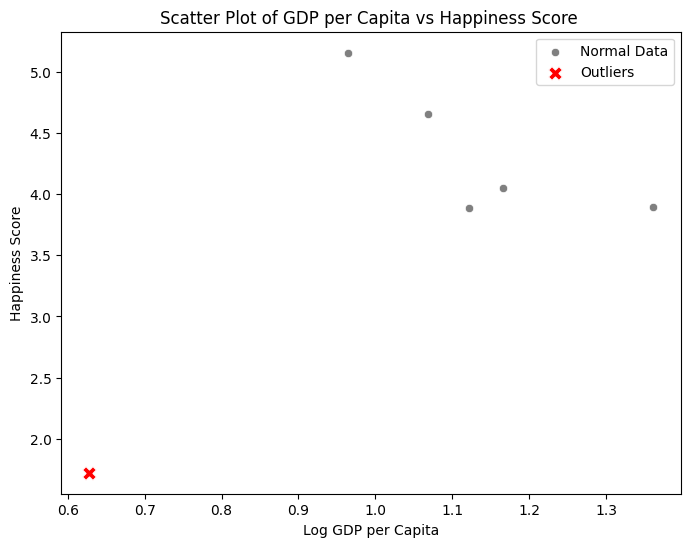

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_data, label='Normal Data', color='gray')

sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, label='Outliers', color='red', s=100, marker='X')

plt.title("Scatter Plot of GDP per Capita vs Happiness Score ")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()

In [ ]:
outlier_countries = outliers[['Country name', 'score', 'Log GDP per capita']]
print("Outlier Countries Based on Score and GDP per Capita:")
print(outlier_countries)

Outlier Countries Based on Score and GDP per Capita:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


Task - 4 - Exploring Trends Across Metrics:
Tasks:

1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.


In [ ]:
correlartion_score_freedom = south_asian_data['score'].corr(south_asian_data['Freedom to make life choices'])
correlartion_score_generosity = south_asian_data['score'].corr(south_asian_data['Generosity'])

print(f"Correlation between Score and Freedom to Make Life Choices: {correlartion_score_freedom}")
print(f"Correlation between Score and Generosity: {correlartion_score_generosity}")

Correlation between Score and Freedom to Make Life Choices: 0.8005185224163315
Correlation between Score and Generosity: 0.874512371253192


2. Create scatter plots with trendlines for these metrics against the Score.


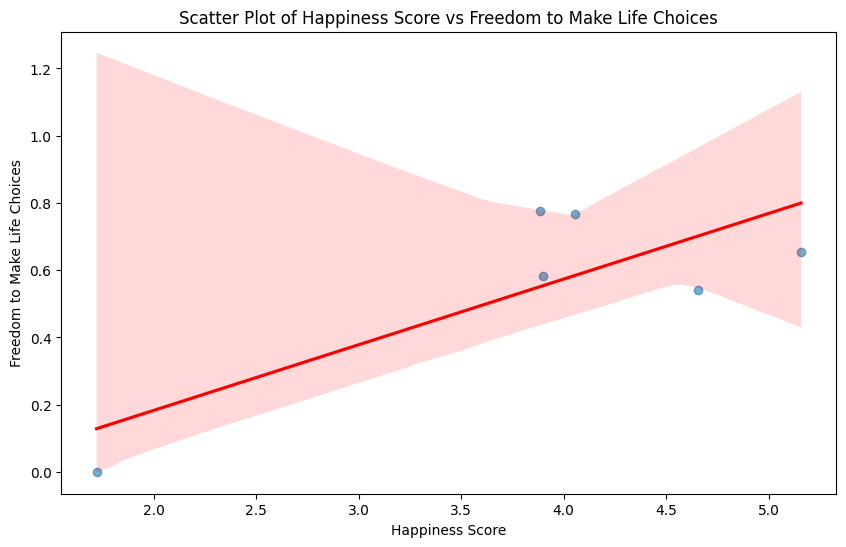

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='score', y='Freedom to make life choices', data=south_asian_data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Scatter Plot of Happiness Score vs Freedom to Make Life Choices")
plt.xlabel("Happiness Score")
plt.ylabel("Freedom to Make Life Choices")
plt.show()

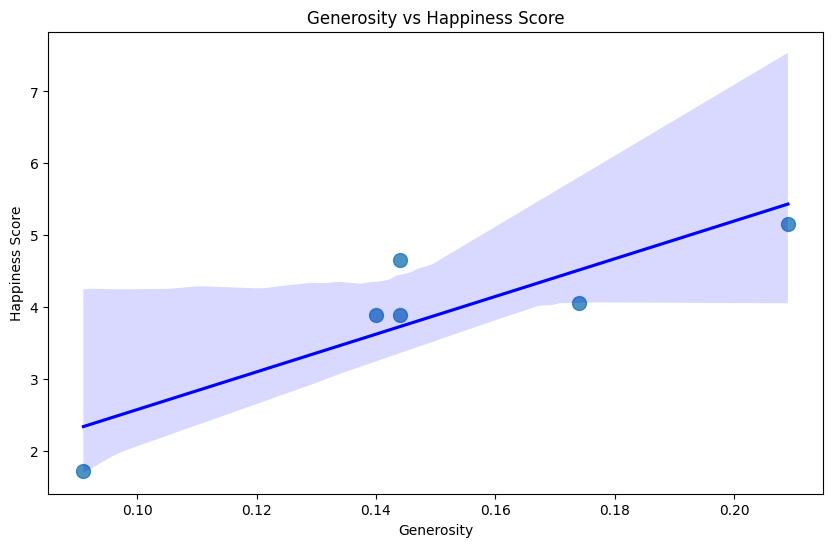

In [ ]:
# Scatter plot for 'Generosity' vs 'Score'
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asian_data, scatter_kws={'s': 100}, line_kws={'color': 'blue'})
plt.title("Generosity vs Happiness Score")
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [ ]:
if abs(correlartion_score_freedom) > abs(correlartion_score_generosity):
    print("\nThe strongest relationship is between 'Freedom to Make Life Choices' and 'Score'.")
else:
    print("\nThe strongest relationship is between 'Generosity' and 'Score'.")

# If both correlations are close to zero, there is no strong linear relationship.
if abs(correlartion_score_freedom) < 0.3 and abs(correlartion_score_generosity) < 0.3:
    print("\nNeither of the relationships is strong, as both correlation coefficients are low.")


The strongest relationship is between 'Generosity' and 'Score'.


Task - 5 - Gap Analysis:
Tasks:

1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [ ]:
south_asian_data['GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']
south_asian_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [ ]:
# Ascending order (negative gap: GDP < Score)
ascending_gap = south_asian_data.sort_values(by='GDP-Score Gap', ascending=True)
ascending_gap


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


In [ ]:
# Descending order (positive gap: GDP > Score)
descending_gap = south_asian_data.sort_values(by='GDP-Score Gap', ascending=False)
descending_gap

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

<ipython-input-74-6783735b506c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score Gap', y='Country name', data=combined_top_3, palette="tab10")


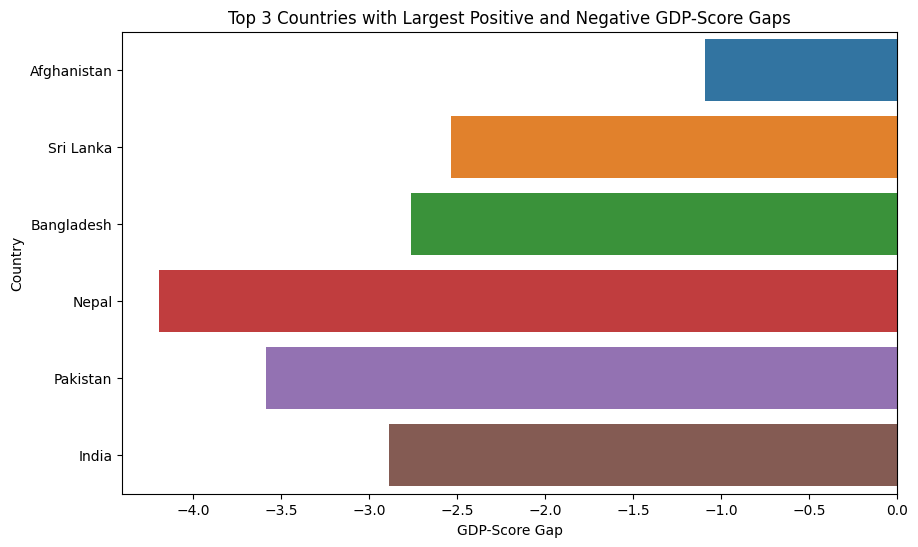

In [ ]:
# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart
top_3_positive = descending_gap.head(3)
top_3_negative = ascending_gap.head(3)

combined_top_3 = pd.concat([top_3_positive[['Country name', 'GDP-Score Gap']],
                            top_3_negative[['Country name', 'GDP-Score Gap']]])


plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=combined_top_3, palette="tab10")
plt.title("Top 3 Countries with Largest Positive and Negative GDP-Score Gaps")
plt.xlabel("GDP-Score Gap")
plt.ylabel("Country")
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [ ]:
print("Top 3 countries with the largest positive GDP-Score Gap:")
print(top_3_positive[['Country name', 'GDP-Score Gap']])

print("\nTop 3 countries with the largest negative GDP-Score Gap:")
print(top_3_negative[['Country name', 'GDP-Score Gap']])

Top 3 countries with the largest positive GDP-Score Gap:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 countries with the largest negative GDP-Score Gap:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


3.3 Problem - 3 -

Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:

1. Similar in Task - 1 of Problem 2

create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

Complete the following task:
1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?


In [28]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

middle_east_data = df[df['Country name'].isin(middle_east_countries)]
middle_east_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [33]:
mean_score_south_asia = south_asian_data['score'].mean()
std_score_south_asia = south_asian_data['score'].std()

mean_score_middle_east = middle_east_data['score'].mean()
std_score_middle_east = middle_east_data['score'].std()

print(f"South Asia - Mean score: {mean_score_south_asia}, Std: {std_score_south_asia}")
print(f"Middle East - Mean score: {mean_score_middle_east}, Std: {std_score_middle_east}")


South Asia - Mean score: 3.895666666666667, Std: 1.1770690152521501
Middle East - Mean score: 5.412100000000001, Std: 1.5662011684327144


In [29]:
top_3_south_asia = south_asian_data.nlargest(3, 'score')  # Top 3 countries with highest score
bottom_3_south_asia = south_asian_data.nsmallest(3, 'score')
bottom_3_south_asia

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.


In [35]:
top_3_middle_east = middle_east_data.nlargest(3, 'score')
top_3_middle_east


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High


In [36]:
bottom_3_middle_east = middle_east_data.nsmallest(3, 'score')
bottom_3_middle_east

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium


<ipython-input-37-b33aeafe901e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_3_south_asia, bottom_3_south_asia]), palette="Blues")


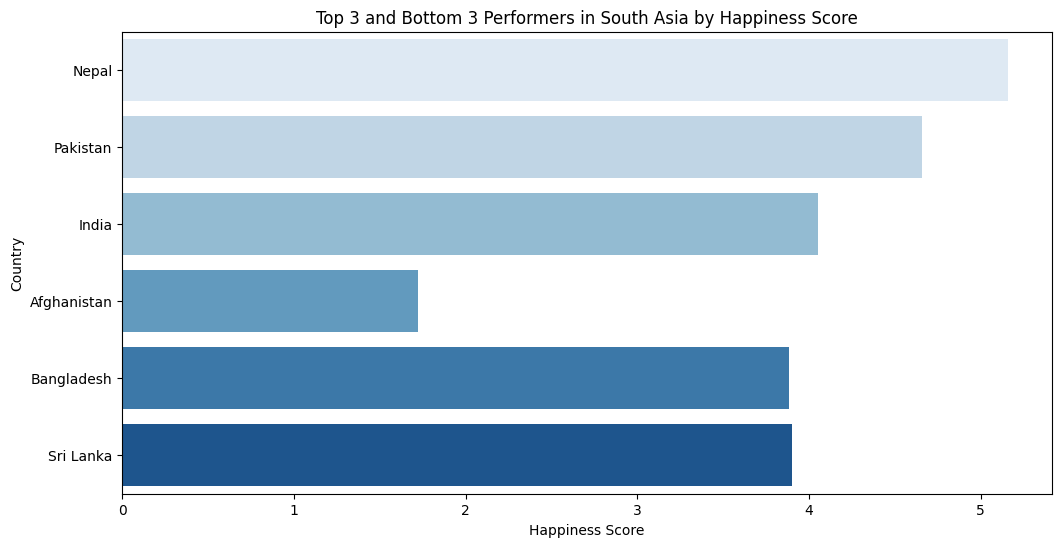

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_south_asia, bottom_3_south_asia]), palette="Blues")
plt.title("Top 3 and Bottom 3 Performers in South Asia by Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

<ipython-input-104-fe086167a4af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_3_middle_east, bottom_3_middle_east]), palette="Blues")


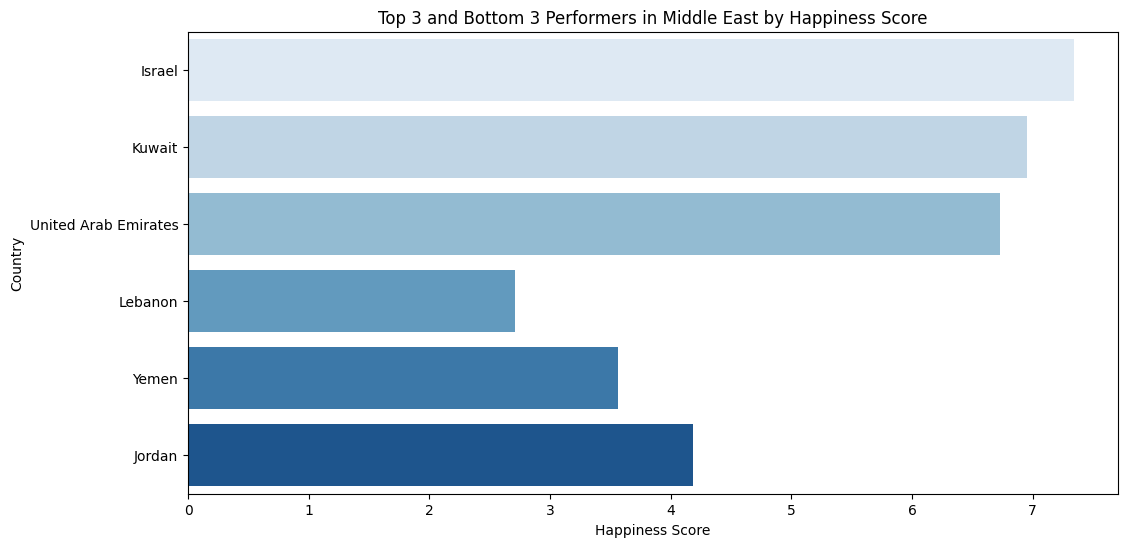

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_middle_east, bottom_3_middle_east]), palette="Blues")
plt.title("Top 3 and Bottom 3 Performers in Middle East by Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?


In [38]:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_means = south_asian_data[metrics].mean()
middle_east_means = middle_east_data[metrics].mean()

# Combine the mean values into a single DataFrame
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'South Asia': south_asia_means.values,
    'Middle East': middle_east_means.values
}).set_index('Metric')

# Calculate the absolute disparity for each metric
comparison_df['Disparity'] = abs(comparison_df['South Asia'] - comparison_df['Middle East'])
comparison_df['Disparity']

,Disparity
Metric,
Log GDP per capita,0.444500
Social support,0.540944
Healthy life expectancy,0.133778


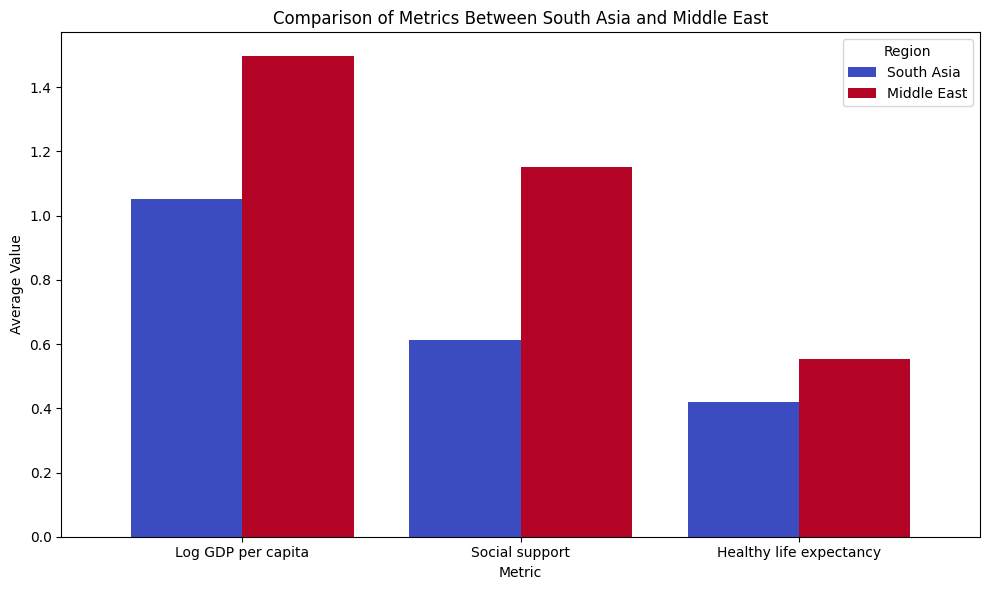

In [39]:
# 2. Create a grouped bar chart to compare the metrics
comparison_df[['South Asia', 'Middle East']].plot(kind='bar', figsize=(10, 6), width=0.8, colormap='coolwarm')
plt.title("Comparison of Metrics Between South Asia and Middle East")
plt.ylabel("Average Value")
plt.xlabel("Metric")
plt.xticks(rotation=0)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

In [ ]:
# Which metrics show the largest disparity between the two regions?
largest_disparity_metric = comparison_df['Disparity'].idxmax()
largest_disparity_value = comparison_df['Disparity'].max()

print("Metrics Comparison:")
comparison_df

Metrics Comparison:


,South Asia,Middle East,Disparity
Metric,,,
Log GDP per capita,1.051833,1.496333,0.444500
Social support,0.611833,1.152778,0.540944
Healthy life expectancy,0.420333,0.554111,0.133778


In [ ]:
print(f"\nThe metric with the largest disparity between South Asia and Middle East is '{largest_disparity_metric}' "
      f"with an absolute disparity of {largest_disparity_value:.2f}.")


The metric with the largest disparity between South Asia and Middle East is 'Social support' with an absolute disparity of 0.54.


4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [ ]:
#Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
range_south_asia = south_asian_data['score'].max() - south_asian_data['score'].min()
range_middle_east = middle_east_data['score'].max() - middle_east_data['score'].min()

mean_south_asia = south_asian_data['score'].mean()
std_south_asia = south_asian_data['score'].std()
cv_south_asia = std_south_asia / mean_south_asia

mean_middle_east = middle_east_data['score'].mean()
std_middle_east = middle_east_data['score'].std()
cv_middle_east = std_middle_east / mean_middle_east

print(f"South Asia - Range of Happiness Score: {range_south_asia:.2f}")
print(f"South Asia - Coefficient of Variation (CV): {cv_south_asia:.2f}")

print(f"\nMiddle East - Range of Happiness Score: {range_middle_east:.2f}")
print(f"Middle East - Coefficient of Variation (CV): {cv_middle_east:.2f}")

# Which region has greater variability in happiness?
if cv_south_asia > cv_middle_east:
    print("\nSouth Asia has greater variability in happiness scores based on CV.")
else:
    print("\nMiddle East has greater variability in happiness scores based on CV.")

South Asia - Range of Happiness Score: 3.44
South Asia - Coefficient of Variation (CV): 0.30

Middle East - Range of Happiness Score: 4.63
Middle East - Coefficient of Variation (CV): 0.29

South Asia has greater variability in happiness scores based on CV.


5. Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

In [ ]:
corr_sa_freedom = south_asian_data['Freedom to make life choices'].corr(south_asian_data['score'])
corr_sa_generosity = south_asian_data['Generosity'].corr(south_asian_data['score'])

corr_me_freedom = middle_east_data['Freedom to make life choices'].corr(middle_east_data['score'])
corr_me_generosity = middle_east_data['Generosity'].corr(middle_east_data['score'])

print("South Asia Correlation:")
print(f"Freedom to Make Life Choices vs Score: {corr_sa_freedom:.2f}")
print(f"Generosity vs Score: {corr_sa_generosity:.2f}")

print("\nMiddle East Correlation:")
print(f"Freedom to Make Life Choices vs Score: {corr_me_freedom:.2f}")
print(f"Generosity vs Score: {corr_me_generosity:.2f}")


South Asia Correlation:
Freedom to Make Life Choices vs Score: 0.80
Generosity vs Score: 0.87

Middle East Correlation:
Freedom to Make Life Choices vs Score: 0.86
Generosity vs Score: 0.63


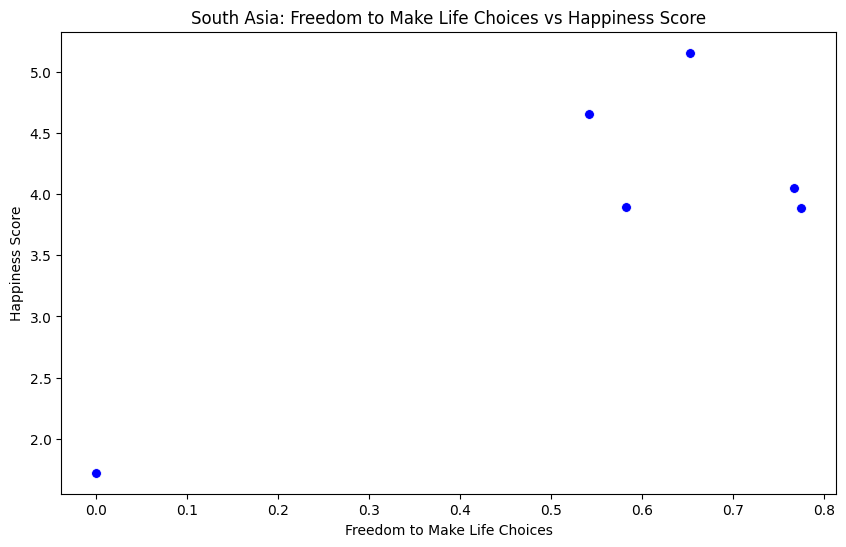

In [ ]:
# Scatter plot for South Asia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asian_data, s=50, color='blue')
plt.title("South Asia: Freedom to Make Life Choices vs Happiness Score")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Happiness Score")
plt.show()


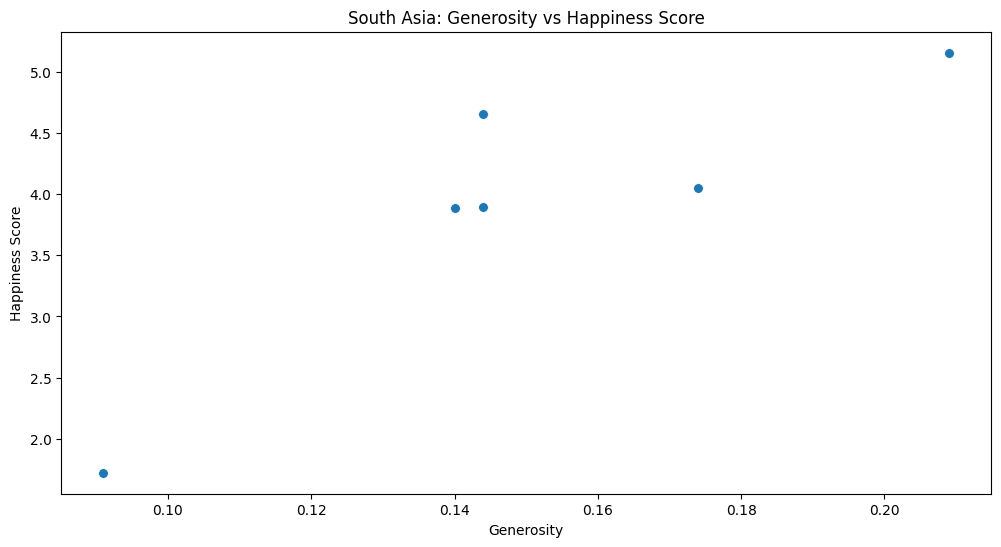

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Generosity', y='score', data=south_asian_data, s= 50,)
plt.title("South Asia: Generosity vs Happiness Score")
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.show()

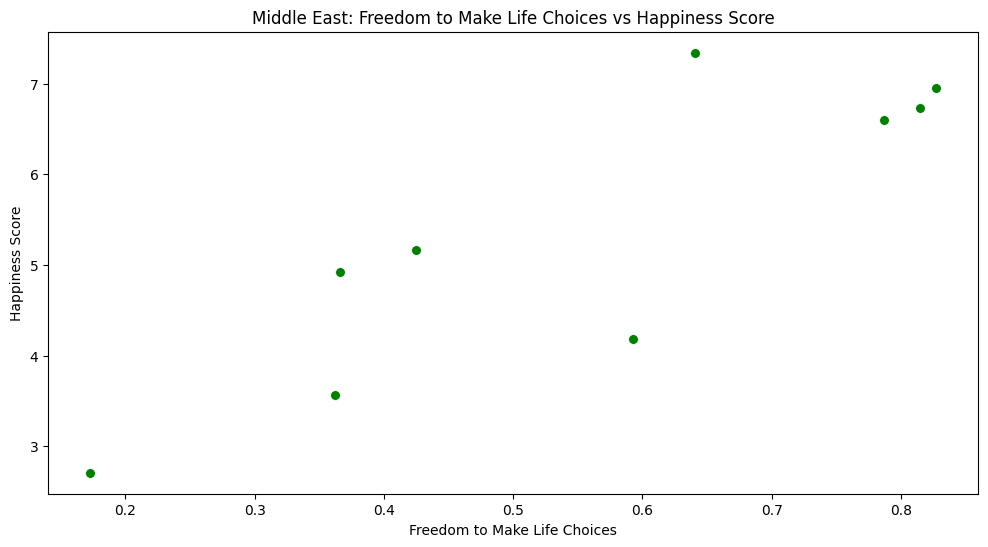

In [ ]:
# Scatter plot for Freedom to Make Life Choices vs Happiness Score (Middle East)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_data, s=50, color='green')
plt.title("Middle East: Freedom to Make Life Choices vs Happiness Score")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Happiness Score")
plt.show()

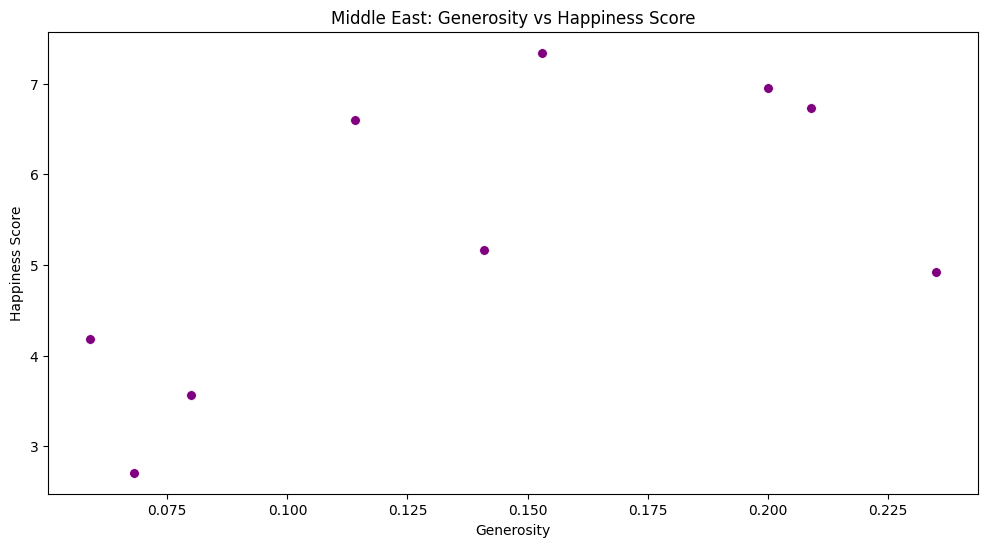

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Generosity', y='score', data=middle_east_data, s=50, color='purple')
plt.title("Middle East: Generosity vs Happiness Score")
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.show()

6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.

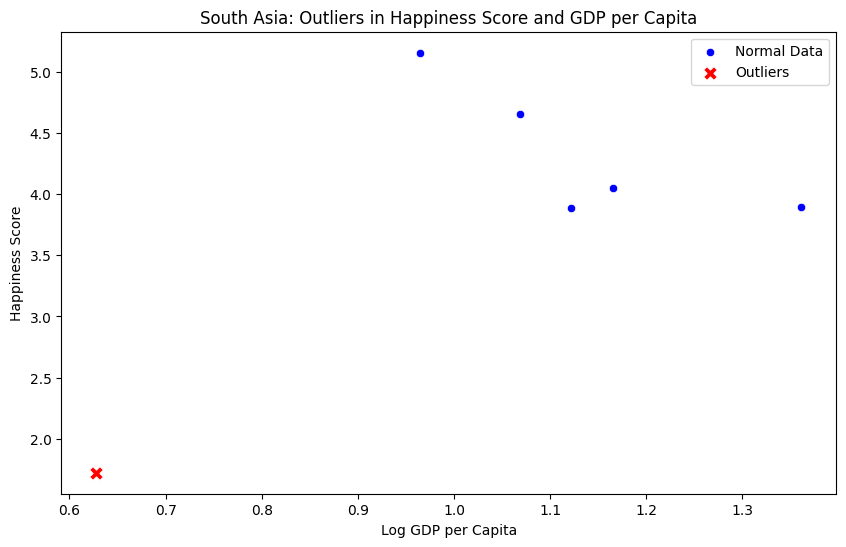

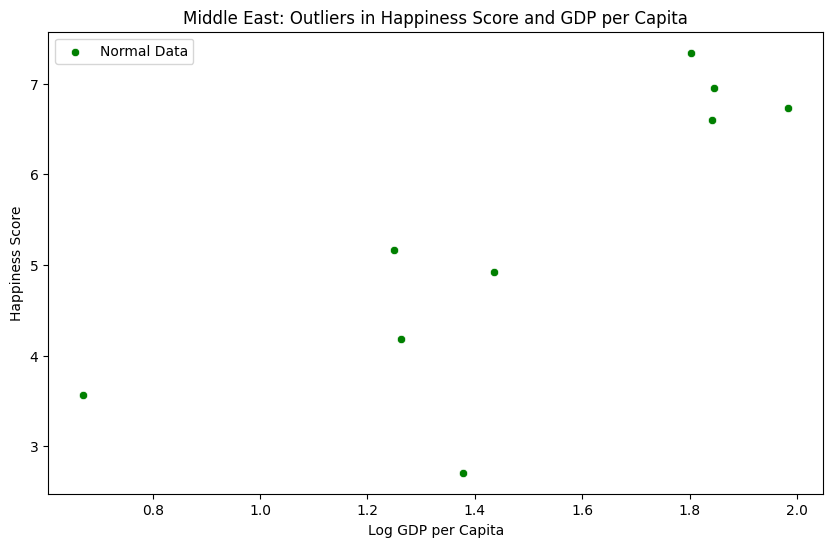

South Asia Outliers:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Middle East Outliers:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


In [ ]:
# Define a function to detect outliers using the 1.5 × IQR rule
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# 1. Identify outliers in South Asia and Middle East for Score and GDP per Capita
outliers_sa_score = detect_outliers(south_asian_data, 'score')
outliers_sa_gdp = detect_outliers(south_asian_data, 'Log GDP per capita')

outliers_me_score = detect_outliers(middle_east_data, 'score')
outliers_me_gdp = detect_outliers(middle_east_data, 'Log GDP per capita')

# Combine all outliers for South Asia and Middle East
outliers_south_asia = pd.concat([outliers_sa_score, outliers_sa_gdp]).drop_duplicates()
outliers_middle_east = pd.concat([outliers_me_score, outliers_me_gdp]).drop_duplicates()

# 2. Plot the outliers for South Asia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_data, label='Normal Data', color='blue')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_south_asia, label='Outliers', color='red', marker='X', s=100)
plt.title("South Asia: Outliers in Happiness Score and GDP per Capita")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()

# 3. Plot the outliers for Middle East
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, label='Normal Data', color='green')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_middle_east, label='Outliers', color='red', marker='X', s=100)
plt.title("Middle East: Outliers in Happiness Score and GDP per Capita")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()

# 4. Print outliers
print("South Asia Outliers:")
print(outliers_south_asia[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East Outliers:")
print(outliers_middle_east[['Country name', 'score', 'Log GDP per capita']])


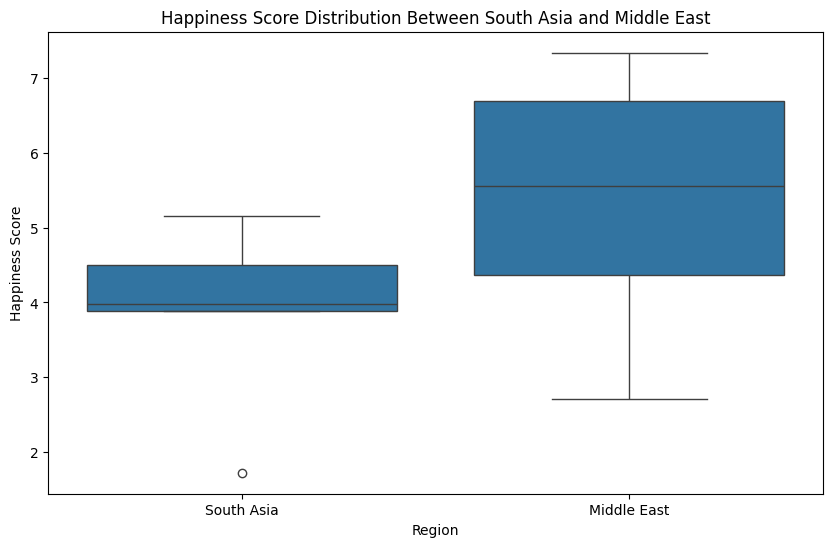

In [ ]:
south_asian_data.loc[:, 'Region'] = 'South Asia'
middle_east_data.loc[:, 'Region'] = 'Middle East'

combined_data = pd.concat([south_asian_data[['Country name', 'score', 'Region']],
                           middle_east_data[['Country name', 'score', 'Region']]])

# Boxplot comparing happiness scores between South Asia and Middle East
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_data)
plt.title('Happiness Score Distribution Between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()
